<IPython.core.display.Javascript object>


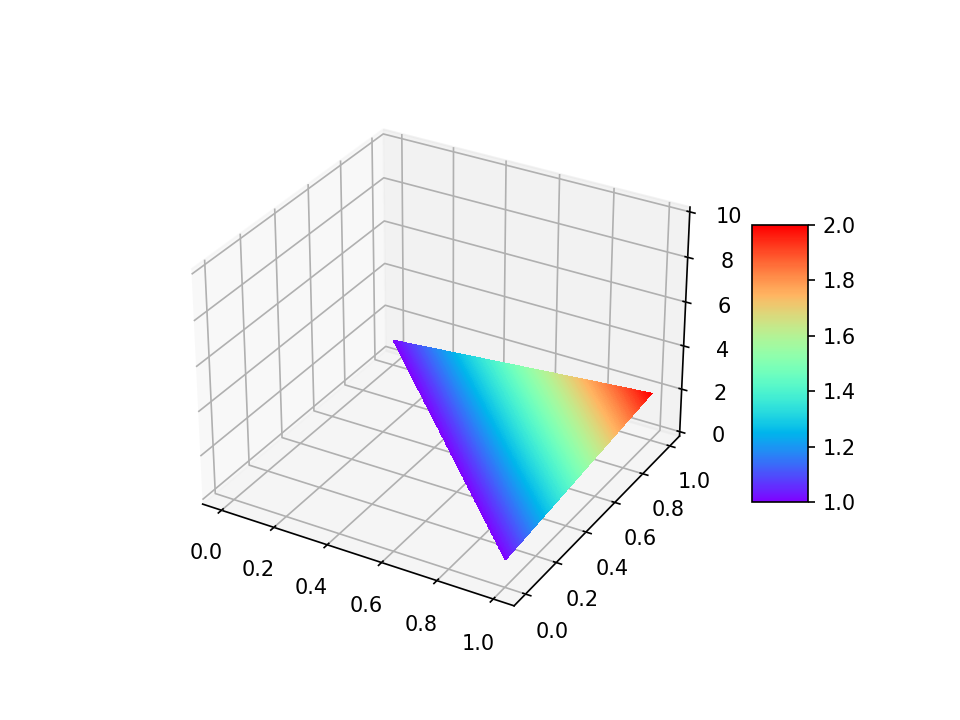

<ipython-input-22-db6565ef7e98>:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf=ax.plot_surface(X, Y, z, cmap='rainbow',antialiased=False,rstride=1,cstride=1,\


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
X, Y = np.meshgrid(x, y)
z = X+Y
mask = (X+Y)<1
z[mask] = np.nan
z[~mask].min()
fig, ax = plt.subplots(dpi=120)
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y, z, cmap='rainbow',antialiased=False,rstride=1,cstride=1,\
                     vmin=z[~mask].min(), vmax=z[~mask].max())
# If there are np.nan, we must set vmin and vmax
ax.set_zlim(0,10)
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('surf')

In [7]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports color mapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    .. note::
    
       To maximize rendering speed consider setting *rstride* and *cstride*
       to divisors of the number of rows minus 1 and columns minus 1
       respectively. For example, given 51 rows rstride can be any of the
       divisors of 50.
    
       Similarly, a setting of *rstride* and *cstride* equal to 1 (or
     

<IPython.core.display.Javascript object>


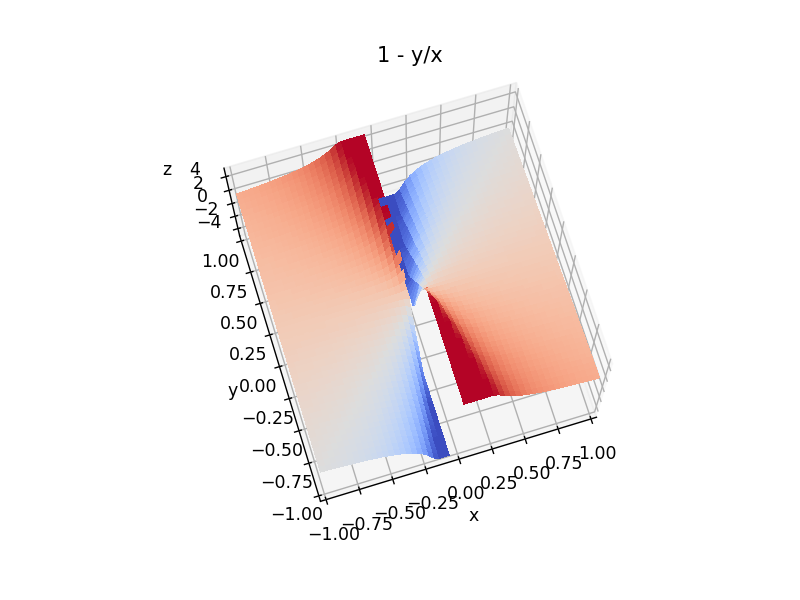

<ipython-input-6-4789d4cd6c48>:25: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0,


In [6]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Generate the data
x = np.linspace(-1.0, 1.0, 50)
y = np.linspace(-1.0, 1.0, 50)
z = np.zeros(len(x))
x,y = np.meshgrid(x,y)
z = 1 - y/x
z[z >= 5.0] = 5.0            # Clips top of surface
z[z <= -5.0] = -5.0          # Clips bottom of surface

# place NaNs at the discontinuity
pos = np.where(np.abs(np.diff(z)) >= 5.0)
z[pos] = np.nan

# Create the plot
p1 = plt.figure()
ax = p1.gca(projection='3d')
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0,
                           vmin=np.nanmin(z), vmax=np.nanmax(z), antialiased=False)
plt.title("1 - y/x")
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(-5.0, 5.0)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
p1.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64),
 array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24],
       dtype=int64))

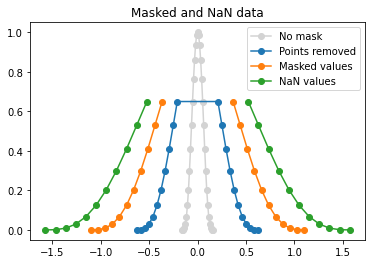

In [1]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()

<IPython.core.display.Javascript object>


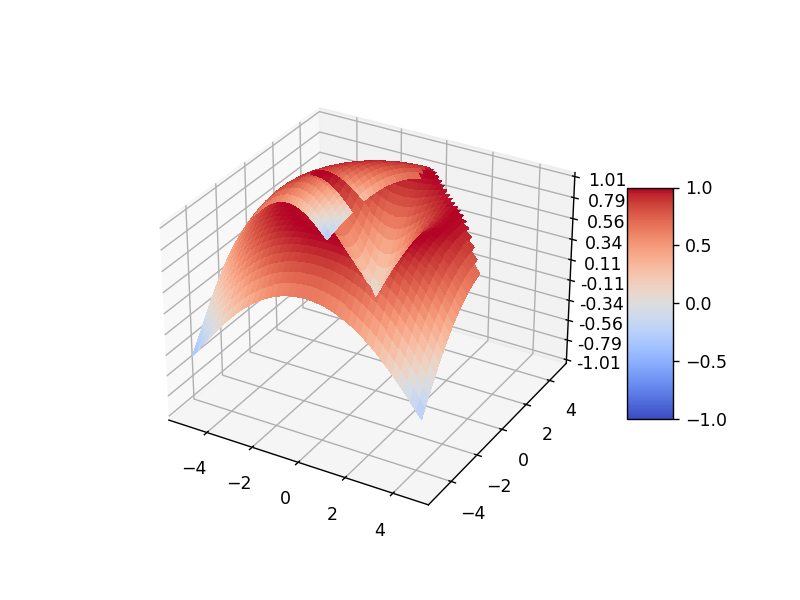

<ipython-input-7-a7512542435d>:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,


In [7]:


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(.5*R)

Z[X+Y>4.] = np.nan  # the diagonal slice

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=-1, vmax=1)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()